In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [28]:
df = pd.read_csv(r"C:\Users\sunia\OneDrive\Desktop\Machine Learining\Bike_Rental_data(in).csv")
df.head()


C:\Users\sunia\AppData\Local\Temp\ipykernel_9168\3763762027.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\sunia\OneDrive\Desktop\Machine Learining\Bike_Rental_data(in).csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.992410,1/1/2011,springer,2011,1,-0.009452,No,5.990616,No work,Clear,0.24,0.2879,0.81,0,3,13,15.999019
1,2.004157,1/1/2011,springer,2011,1,1.007925,No,5.996162,No work,Clear,0.22,0.2727,0.8,0,8,32,40.004970
2,2.984610,1/1/2011,springer,2011,1,1.993083,No,6.004768,No work,Clear,0.22,0.2727,?,0,5,27,32.004786
3,3.993251,1/1/2011,springer,2011,1,2.991451,No,5.980473,No work,Clear,0.24,0.2879,0.75,0,3,10,12.999856
4,4.990763,1/1/2011,springer,2011,1,4.024688,No,5.984412,No work,Clear,0.24,0.2879,0.75,0,0,1,1.002089


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100576 entries, 0 to 100575
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   instant     100576 non-null  float64
 1   dteday      100576 non-null  object 
 2   season      100576 non-null  object 
 3   yr          100576 non-null  object 
 4   mnth        100576 non-null  object 
 5   hr          100576 non-null  float64
 6   holiday     100576 non-null  object 
 7   weekday     100576 non-null  float64
 8   workingday  100576 non-null  object 
 9   weathersit  100576 non-null  object 
 10  temp        100576 non-null  object 
 11  atemp       100576 non-null  object 
 12  hum         100576 non-null  object 
 13  windspeed   100576 non-null  object 
 14  casual      100576 non-null  object 
 15  registered  100576 non-null  object 
 16  cnt         100576 non-null  float64
dtypes: float64(4), object(13)
memory usage: 13.0+ MB


In [30]:
df.describe()


,instant,hr,weekday,cnt
count,100576.000000,100576.000000,100576.000000,100576.000000
mean,8688.878771,11.552431,3.002402,189.332859
std,5019.386012,6.921326,2.008345,181.247215
min,0.987460,-0.037539,-0.040162,0.976830
25%,4345.006095,5.986351,1.006304,39.998170
50%,8686.993279,11.986028,3.000195,141.998595
75%,13038.998690,17.983380,4.993783,280.989003
max,17379.006830,23.037515,6.039560,977.012922


In [31]:
df.replace("?", np.nan, inplace=True)

num_cols = ["temp","atemp","hum","windspeed","casual","registered"]
df[num_cols] = df[num_cols].astype(float)

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = ["season","yr","mnth","holiday","workingday","weathersit"]
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [32]:
df.describe()


,instant,hr,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,100576.000000,100576.000000,100576.000000,100576.000000,100576.000000,100576.000000,100576.000000,100576.000000,100576.000000,100576.000000
mean,8688.878771,11.552431,3.002402,0.496871,0.475682,0.627215,0.189942,35.650344,153.685859,189.332859
std,5019.386012,6.921326,2.008345,0.192527,0.171902,0.192714,0.122130,49.279082,151.203346,181.247215
min,0.987460,-0.037539,-0.040162,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.976830
25%,4345.006095,5.986351,1.006304,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,39.998170
50%,8686.993279,11.986028,3.000195,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,141.998595
75%,13038.998690,17.983380,4.993783,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,280.989003
max,17379.006830,23.037515,6.039560,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.012922


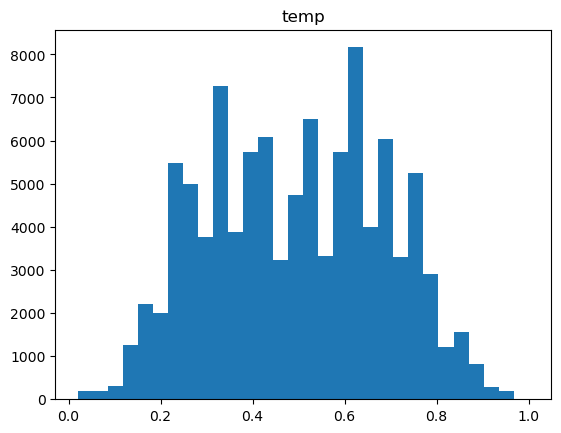

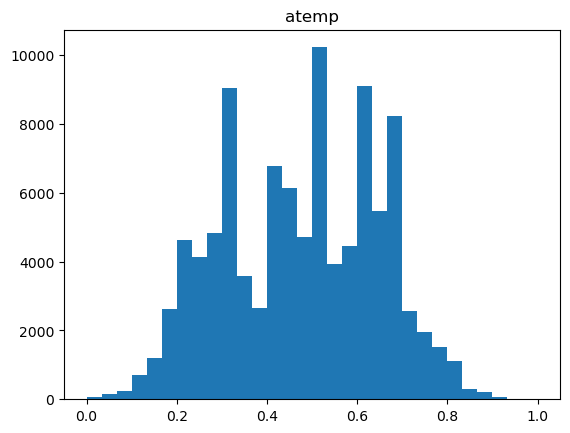

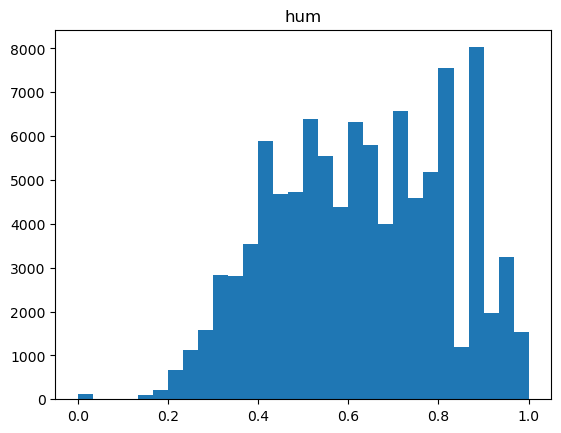

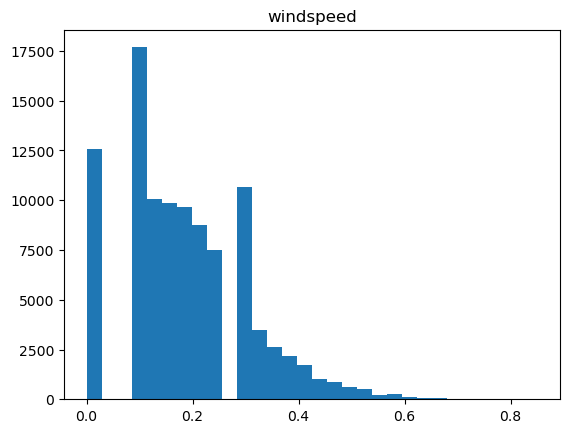

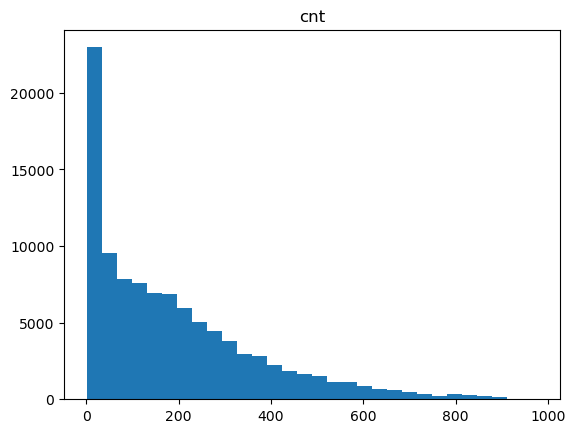

In [33]:
num_features = ["temp","atemp","hum","windspeed","cnt"]

for col in num_features:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(col)
    plt.show()


In [34]:
df_encoded = pd.get_dummies(
    df,
    columns=["season","yr","mnth","holiday","workingday","weathersit"],
    drop_first=True
)

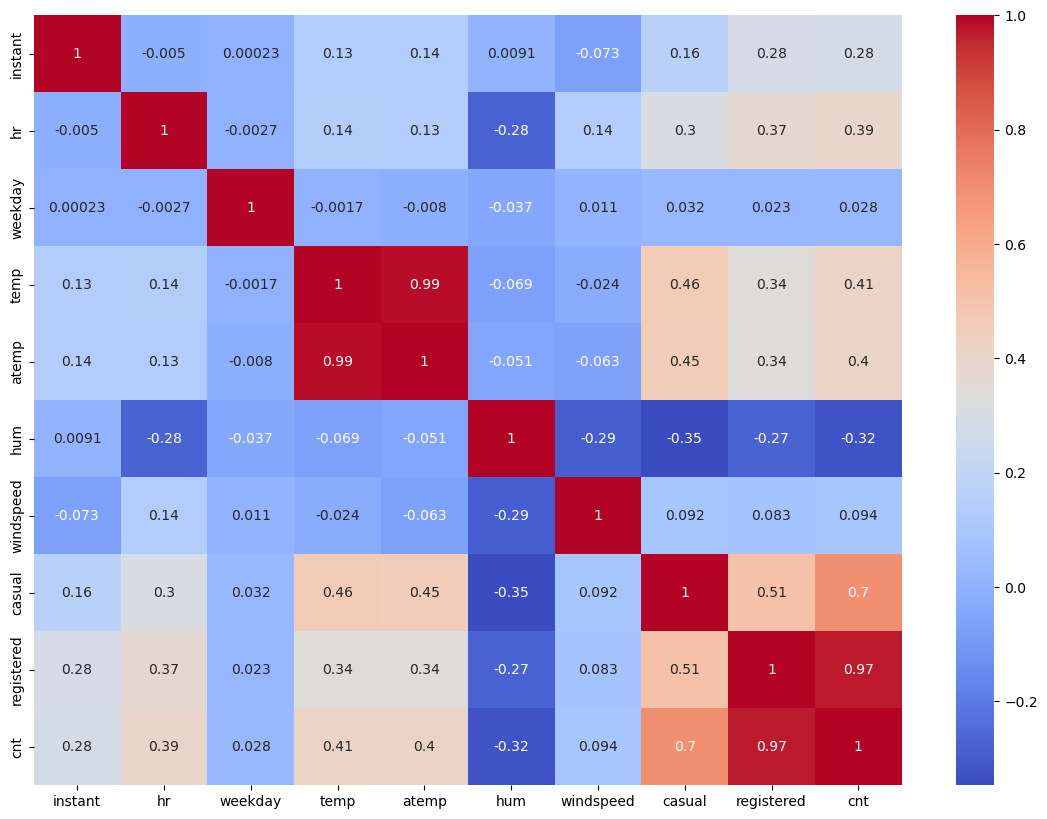

In [36]:
plt.figure(figsize=(14,10))
numeric_df = df_encoded.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.show()


In [39]:
X = df_encoded.drop(["cnt","dteday"], axis=1)
y = df_encoded["cnt"]


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [41]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

r2_lr, mse_lr, rmse_lr, mae_lr


(0.9999965176024104,
 0.11464268333381071,
 np.float64(0.33858925460476547),
 0.019620761474570838)

In [43]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

r2_poly, mse_poly, rmse_poly, mae_poly


(0.9999964570585054,
 0.11663582614427473,
 np.float64(0.3415198766459644),
 0.04298817841849949)

In [44]:
alphas = np.logspace(-4, 1, 20)
lasso_scores = {}

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    lasso_scores[a] = r2_score(y_test, y_pred)

best_alpha_lasso = max(lasso_scores, key=lasso_scores.get)
best_alpha_lasso


np.float64(0.0069519279617756054)

In [45]:
lasso = Lasso(alpha=best_alpha_lasso)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

r2_lasso, mse_lasso, rmse_lasso, mae_lasso


(0.9999965184824482,
 0.11461371194331894,
 np.float64(0.3385464694001681),
 0.013630347747036873)

In [46]:
ridge_scores = {}

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    ridge_scores[a] = r2_score(y_test, y_pred)

best_alpha_ridge = max(ridge_scores, key=ridge_scores.get)
best_alpha_ridge


np.float64(0.0001)

In [47]:
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

r2_ridge, mse_ridge, rmse_ridge, mae_ridge


(0.999996517602403,
 0.1146426835739713,
 np.float64(0.33858925495941433),
 0.01962078102277326)

In [49]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression", "Lasso Regression", "Ridge Regression"],
    "R2 Score": [r2_lr, r2_poly, r2_lasso, r2_ridge],
    "MSE": [mse_lr, mse_poly, mse_lasso, mse_ridge],
    "RMSE": [rmse_lr, rmse_poly, rmse_lasso, rmse_ridge],
    "MAE": [mae_lr, mae_poly, mae_lasso, mae_ridge]
})

results


,Model,R2 Score,MSE,RMSE,MAE
0,Linear Regression,0.999997,0.114643,0.338589,0.019621
1,Polynomial Regression,0.999996,0.116636,0.341520,0.042988
2,Lasso Regression,0.999997,0.114614,0.338546,0.013630
3,Ridge Regression,0.999997,0.114643,0.338589,0.019621
